# Data, Estimation and Inference Lab
**Author** : Pierre Osselin \
**Mail** : pierre.osselin@eng.ox.ac.uk

In [1]:
from IPython.core.display import display, HTML
%load_ext autoreload
%autoreload 2
display(HTML("<style>.container { width:100% !important; }</style>"))

## Library Importation

In [2]:
import pandas as pd
from kernel import *
from model import GaussianProcess
from visualization import visualize_ax
from utils import transform_time_hour, transform_time_day
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [3]:
data = pd.read_csv('data/sotonmet.txt', sep=",")

In [4]:
data.iloc[500:600]

Update Date and Time (ISO)  Update Duration (ms)  \
500        2007-05-28T07:50:00                     0   
501        2007-05-28T07:55:00                     0   
502        2007-05-28T08:00:00                     0   
503        2007-05-28T08:10:00                     0   
504        2007-05-28T08:15:00                     0   
..                         ...                   ...   
595        2007-05-28T20:15:00                     0   
596        2007-05-28T20:20:00                     0   
597        2007-05-28T20:25:00                     0   
598        2007-05-28T20:30:00                     0   
599        2007-05-28T20:40:00                     0   

    Reading Date and Time (ISO)  Air pressure (mb)  Air temperature (C)  \
500         2007-05-28T07:50:00             1002.0                  5.8   
501         2007-05-28T07:55:00             1002.0                  5.8   
502         2007-05-28T08:00:00             1003.0                  5.5   
503         2007-05-28T08:10:00             1003.0                  5.9   
504         2007-05-28T08:15:00             1003.0                  6.3   
..                          ...                ...                  ...   
595         2007-05-28T20:15:00             1009.0                 10.6   
596         2007-05-28T20:20:00             1009.0                 10.6   
597         2007-05-28T20:25:00             1009.0                 11.2   
598         2007-05-28T20:30:00             1009.0                 10.6   
599         2007-05-28T20:40:00             1009.0                 10.0   

     Tide height (m)  Wind direction (deg)  Wind gust speed (kn)  \
500              2.9                 358.0                  34.2   
501              3.0                 359.0                  32.1   
502              3.1                   1.0                  27.4   
503              3.2                 352.0                  35.2   
504              3.2                 354.0                  27.6   
..               ...                   ...                   ...   
595              3.4                 341.0                  10.3   
596              3.4                 335.0                  21.0   
597              3.5                 338.0                  24.7   
598              3.6                 346.0                  22.5   
599              3.7                 331.0                  19.0   

     Wind speed (kn)  True air temperature (C)  True tide height (m)  \
500             27.0                      5.83                  2.91   
501             24.8                      5.83                  2.98   
502             21.7                      5.50                  3.05   
503             24.9                      5.42                  3.17   
504             27.5                      6.25                  3.22   
..               ...                       ...                   ...   
595             10.0                     11.25                  3.36   
596             14.1                     10.58                  3.44   
597             18.4                     11.17                  3.50   
598             17.2                     10.63                  3.57   
599             16.9                     10.25                  3.70   

     Independent tide height prediction (m)  \
500                                  2.8857   
501                                  2.9634   
502                                  3.0498   
503                                  3.1888   
504                                  3.2349   
..                                      ...   
595                                  3.3370   
596                                  3.4263   
597                                  3.4868   
598                                  3.5480   
599                                  3.6858   

     Independent tide height deviation (m)  \
500                               0.017914   
501                               0.017353   
502                               0.017047   

In [5]:
np.unique(data["Update Date and Time (ISO)"].values, return_counts = True)[0][(np.unique(data["Update Date and Time (ISO)"].values, return_counts = True)[1] > 1)]

array(['2007-05-28T16:10:00'], dtype=object)

In [ ]:
# Get Data
y = data["Tide height (m)"]
y_norm = (y - np.mean(y)).values

# Ground Truth
y_true = data["True tide height (m)"]
y_true_norm = (y_true - np.mean(y_true)).values


# Reading Time
t = transform_time_day(data["Reading Date and Time (ISO)"])

# training / missing data

t_train = t[~data["Tide height (m)"].isnull()]
t_test = np.linspace(-1, 6, 1600)
t_test_true = t[data["Tide height (m)"].isnull()]

y_train = y_norm[~data["Tide height (m)"].isnull()]
y_test_true = y_true_norm[data["Tide height (m)"].isnull()]

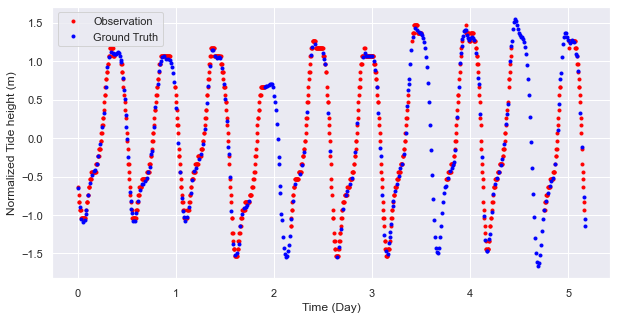

In [9]:
## Plot the data
plt.figure(figsize=(10,5))
plt.plot(t, y_norm, ".", color = "red", label = "Observation")
plt.plot(t_test_true, y_test_true, ".", color = "blue", label = "Ground Truth")
plt.xlabel("Time (Day)")
plt.ylabel("Normalized Tide height (m)")
plt.legend()
#plt.savefig("Data.png", dpi = 150)

## Prior Functional Assumption
- Plot Functional Prior for different Kernels

C:\Users\Pierre Osselin\Desktop\Oxford\Course\data_inference\kernel.py:199: RuntimeWarning: invalid value encountered in multiply
  result = part1 * part2 * part3
C:\Users\Pierre Osselin\Desktop\Oxford\Course\data_inference\kernel.py:199: RuntimeWarning: invalid value encountered in multiply
  result = part1 * part2 * part3


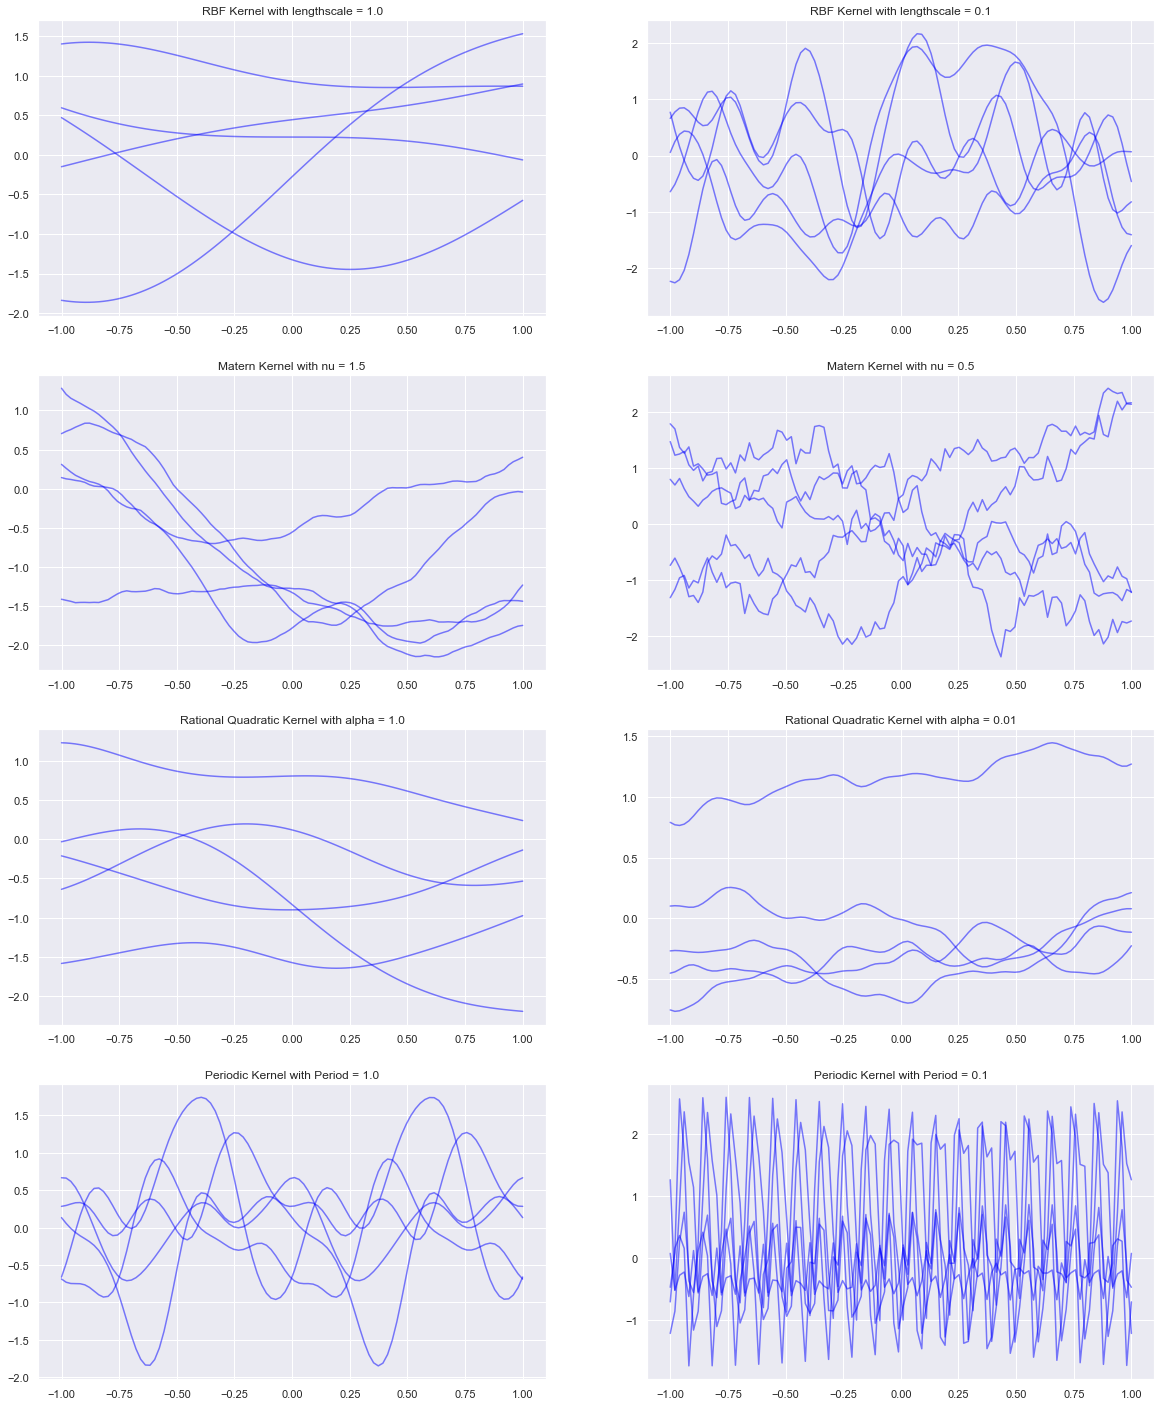

In [7]:
f, axs = plt.subplots(4,2, figsize=(20,25))

x = np.linspace(-1, 1, 100)
list_kernel = [RBF(1.), RBF(0.1), Matern(mu = 3/2), Matern(), RQ(alpha = 1.), RQ(alpha = 0.01), Periodic(p = 1.), Periodic(p = 0.1)]
for i, kernel in enumerate(list_kernel):
    K = kernel.compute_covariance(x.reshape(-1,1))
    samples = np.random.multivariate_normal([0 for i in range(len(x))], K, 5)
    for j in range(5):
        axs[i//2, i%2].plot(x, samples[j], "-", color='blue', alpha=0.5)
        
axs[0,0].set_title("RBF Kernel with lengthscale = {}".format(1.))
axs[0,1].set_title("RBF Kernel with lengthscale = {}".format(0.1))
axs[1,0].set_title("Matern Kernel with nu = {}".format(1.5))
axs[1,1].set_title("Matern Kernel with nu = {}".format(0.5))
axs[2,0].set_title("Rational Quadratic Kernel with alpha = {}".format(1.))
axs[2,1].set_title("Rational Quadratic Kernel with alpha = {}".format(0.01))
axs[3,0].set_title("Periodic Kernel with Period = {}".format(1.))
axs[3,1].set_title("Periodic Kernel with Period = {}".format(0.1))

#plt.savefig("PriorSamples.png", dpi = 150)

## Gaussian Process Regression to Predict Missing Data

### Estimate Noise
- With Ground Truth
- With RBF Hyperparameter tuning
- Influence of Noise on Prediction

In [10]:
y_noise = data["Tide height (m)"][~data["Tide height (m)"].isnull()]
y_nnoise = data["True tide height (m)"][~data["Tide height (m)"].isnull()]
noise = np.sqrt(np.mean((y_noise - y_nnoise)**2))
print("Noise estimated : {}".format(noise))

Noise estimated : 0.029336538604165945


-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1574.3687501888342
Value Parameters: [0.06130411 0.80883021 0.02931456]
The noise hyperparameter is 0.02931455630950178


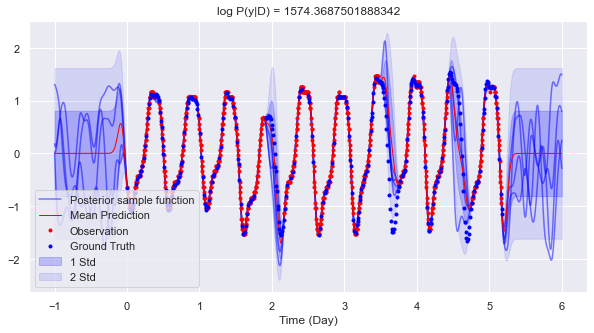

In [11]:
f, ax = plt.subplots(1,1, figsize=(10,5))
kernel = RBF(0.1)
model = GaussianProcess(kernel, noise = 0.5)
model.fit(t_train, y_train)
parameters, score = model.optimize(optimize_noise = True, verbose = 1)
result = model.predict(t_test)
ax = visualize_ax(t_train, y_train, t_test_true, y_test_true,  t_test, result, ax)
ax.set_title("log P(y|D) = {}".format(score))
print("The noise hyperparameter is {}".format(parameters[-1]))
plt.show()

Computing noise: 0.01
Computing noise: 0.03
Computing noise: 0.1
Computing noise: 1.0


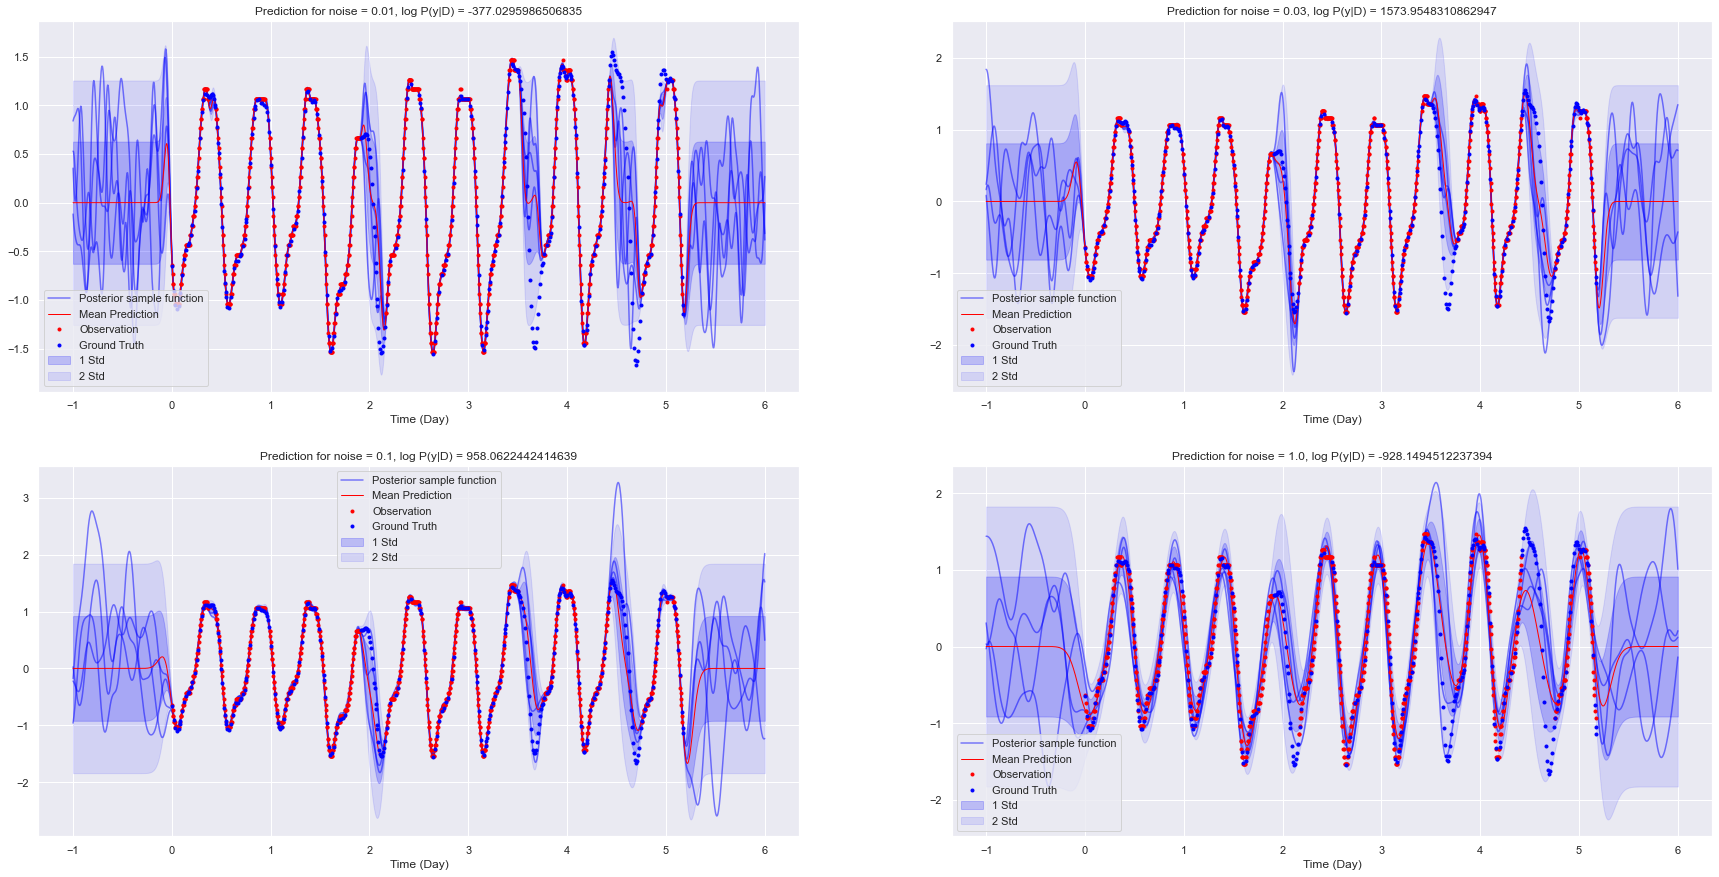

In [12]:
## Try noise levels : [0.01, 0.03, 0.1, 0.5] ~ 3 minutes
noise_list = [0.01, 0.03, 0.1, 1.]
f, axs = plt.subplots(2,2, figsize=(30,15))
kernel = RBF(0.1)

for i, noise in enumerate(noise_list):
    print("Computing noise:", noise)
    model = GaussianProcess(kernel, noise = noise)
    model.fit(t_train, y_train)
    _, score = model.optimize()
    result = model.predict(t_test)
    axs[i // 2, i % 2] = visualize_ax(t_train, y_train, t_test_true, y_test_true,  t_test, result, axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title("Prediction for noise = {}, log P(y|D) = {}".format(noise, score))

**Comment:** With more noise the prediction is more diluted and regressed to the mean, as we can see on the last spikes of the last figure.

### Regression with Classical Kernels
- Gaussian Process Regression with Optimized Kernels
- Optimized kernels for RQ, Matern, Periodic and RBF
We implemented an hyperparameter optimizer that take any kernel structure and optimize its hyperparameter in the log space. Bounds can be included as well as parameter freezing.

Computing Kernel: RBF
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1511.390979478517
Value Parameters: [0.06283357 0.82109182]
Computing Kernel: RQ
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1515.7919955376533
Value Parameters: [0.07728329 4.00634141 0.94047517]
Computing Kernel: Matern
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1516.2125597093655
Value Parameters: [0.08263994 7.1893504  0.9437639 ]
Computing Kernel: Periodic
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: -6437.827138004904
Value Parameters: [0.13047719 0.5148059  0.71284427]


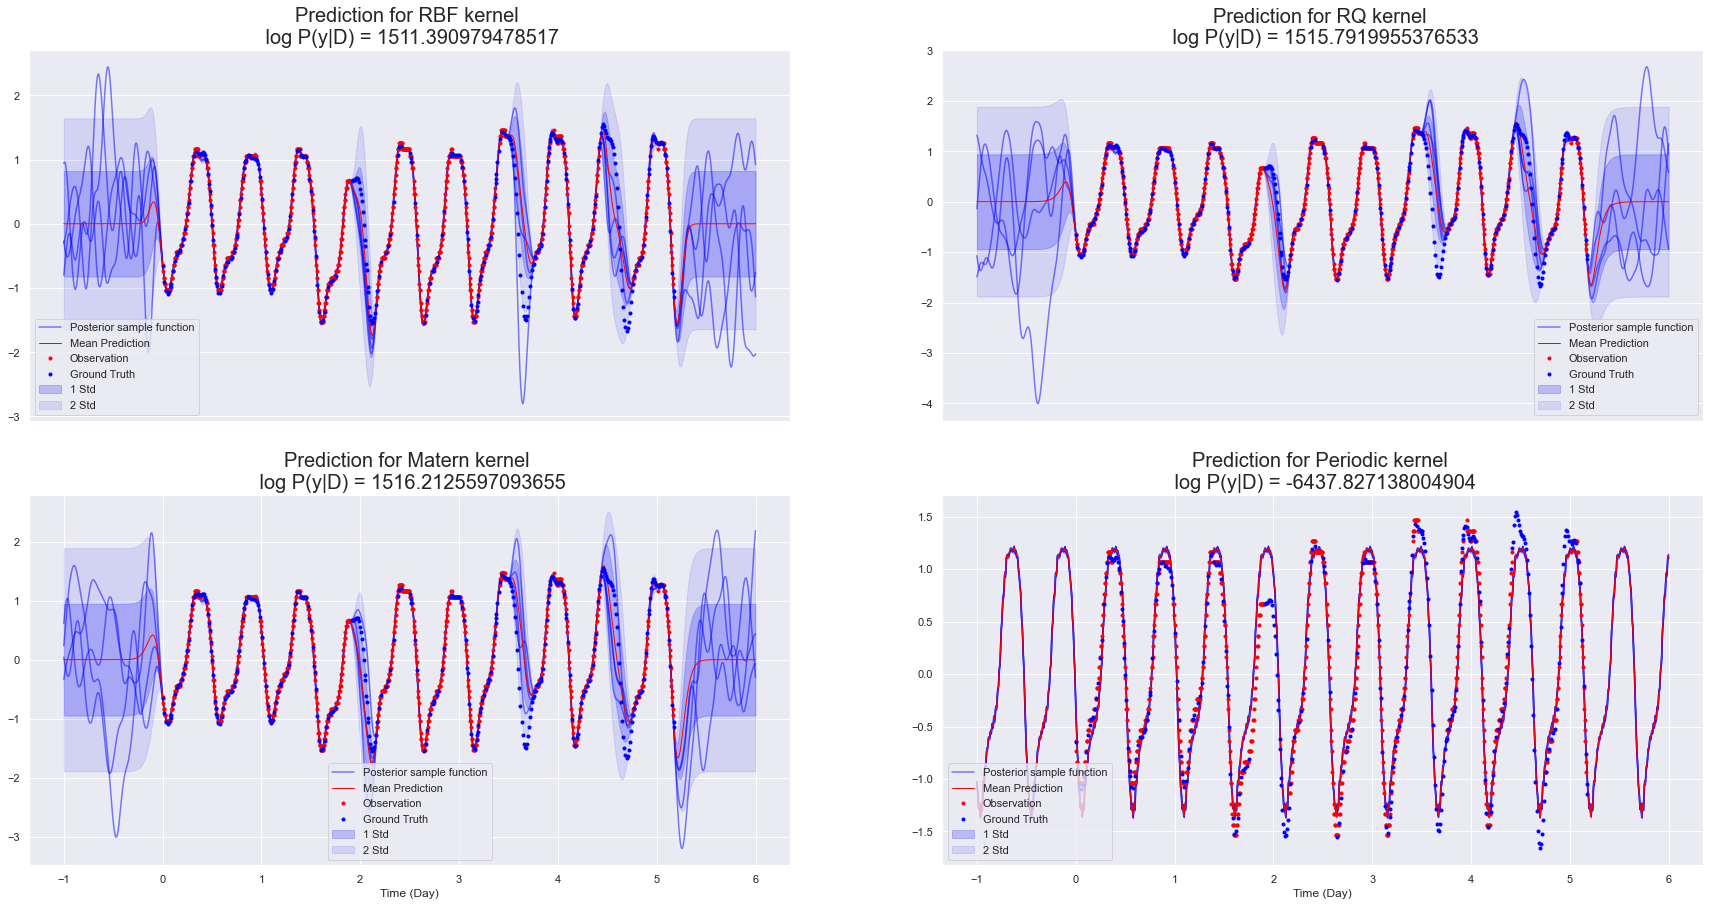

In [17]:
kernels = [(RBF(), "RBF"), (RQ(), "RQ"), (Matern(), "Matern"), (Periodic(), "Periodic")]
f, axs = plt.subplots(2,2, figsize=(30,15))
for i, (kernel, name) in enumerate(kernels):
    print("Computing Kernel:", name)
    model = GaussianProcess(kernel, noise = 0.04)
    model.fit(t_train, y_train)
    _, score = model.optimize(verbose = 1)
    result = model.predict(t_test)
    axs[i // 2, i % 2] = visualize_ax(t_train, y_train, t_test_true, y_test_true,  t_test, result, axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title("Prediction for {} kernel \n log P(y|D) = {}".format(name, score), fontsize=20)

axs[0, 0].get_xaxis().set_visible(False)
axs[0, 1].get_xaxis().set_visible(False)

#plt.savefig("ClassicalKernel.png", dpi = 150)

**Comments**: We can notice none of these kernels are able to capture the full data pattern:
- The Periodic Kernel fails to predict accurately the variability in the spikes intensity nor the roughness of the spikes. Moreover, the uncertainty is very small, this the typical behaviour of a kernel not expressive enough: given that the data is periodic, the whole complexity of the model has been filled and is certain of its predictions.

- We observe the same behavior for the RBf, RQ and Matern kernel, where the whole function smoothness of the function is captured in these model hyperparameters and the local roughness at some specific points is considered as noise, similarily the periodicity is clearly not captured when needed (for the Matern Kernel $\mu = 7.2$ which is high, and for RQ, $\alpha = 4.$ if these parameters are high the function modeled is smooth, the lengthscale found are similar).

### Combined Kernels
- Kernel Refinment with kernel combination

There is a global periodicity that should be captured via the addition of a Periodic Kernel. For the local roughness at the top of the spikes, we can model via a RQ, RBF or Matern kernel.

#### Periodic + {RBF, RQ, Matern} Kernel

Computing Kernel: RBF
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1605.8438856303048
Value Parameters: [0.05556108 0.18905859 0.81660221 0.51435544 0.77707009]
Computing Kernel: RQ
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1608.6197035758246
Value Parameters: [0.07037962 1.21839064 0.20715519 0.8406838  0.51480816 0.7872517 ]
Computing Kernel: Matern
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1607.6336960376475
Value Parameters: [0.06913823 5.50801257 0.19901135 0.82844797 0.51461239 0.78148407]


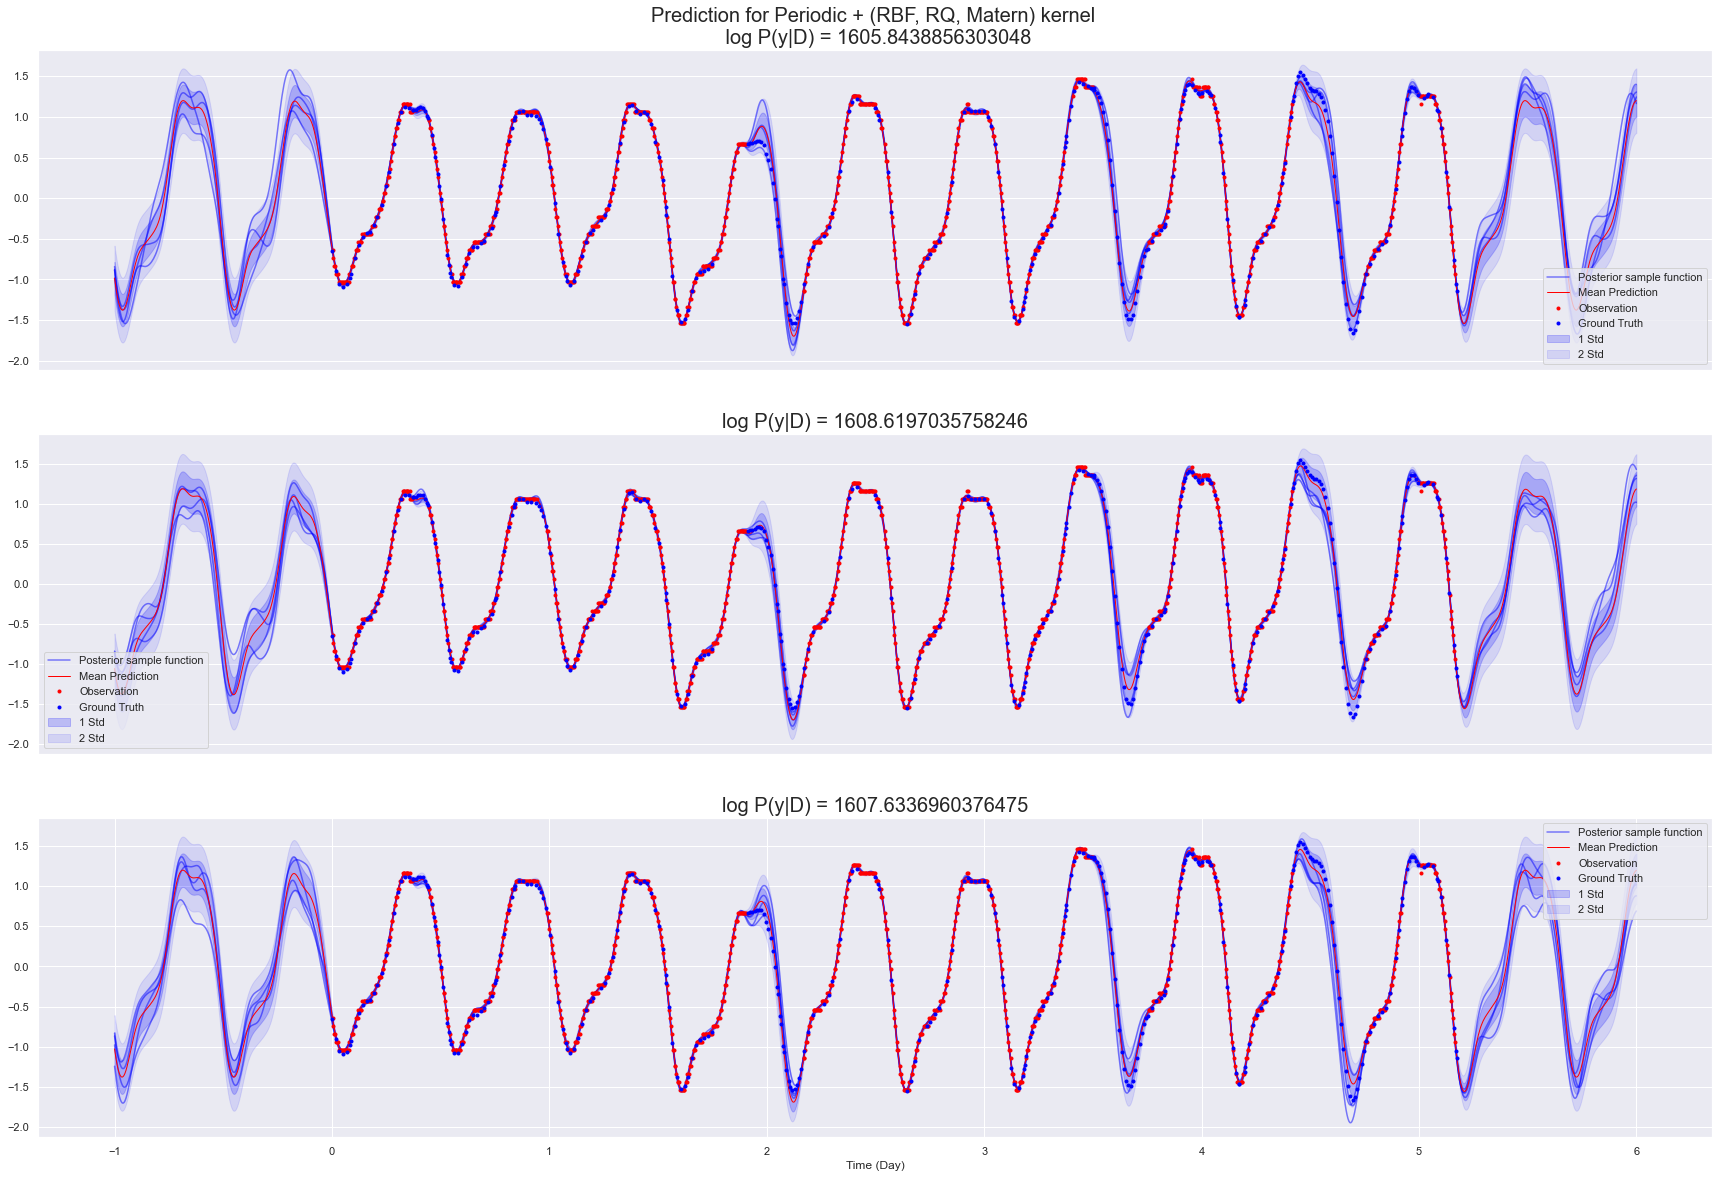

In [30]:
kernels = [(RBF(), "RBF"), (RQ(), "RQ"), (Matern(), "Matern")]
f, axs = plt.subplots(3,1, figsize=(30,20))
list_score = []
for i, (kernel, name) in enumerate(kernels):
    print("Computing Kernel:", name)
    model = GaussianProcess(Add_Kernel(kernel, Periodic()), noise = 0.04)
    model.fit(t_train, y_train)
    _, score = model.optimize(verbose = 1)
    list_score.append(score)
    result = model.predict(t_test)
    axs[i] = visualize_ax(t_train, y_train, t_test_true, y_test_true,  t_test, result, axs[i])
    axs[i].set_title("log P(y|D) = {}".format(score), fontsize=20)
axs[0].set_title("Prediction for Periodic + (RBF, RQ, Matern) kernel \n log P(y|D) = {}".format(list_score[0]), fontsize=20)
axs[0].get_xaxis().set_visible(False)
axs[1].get_xaxis().set_visible(False)
#plt.savefig("AddKernel.png", dpi = 150)

**Comments** : We can see the three kernels have very similar performances, the resulting kernel is able to capture both the periodicity and the uncertainty due to the absence of points.

#### Periodic x (1 + {RBF, RQ, Matern}) Kernel
- We can add complexity to see the effect

Computing Kernel: RBF
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1612.0938606774441
Value Parameters: [0.3301907  0.44153366 0.75660436 0.50715983 0.44154395 0.82766947
 0.51459825 0.78822836]
Computing Kernel: RQ
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1608.6196731854484
Value Parameters: [7.04056340e-02 1.21468955e+00 4.55295619e-01 7.67791775e+05
 7.66949967e-02 4.54718544e-01 8.40283933e-01 5.14809903e-01
 7.86713182e-01]
Computing Kernel: Matern
The following parameters failed: [1.45061655e+00 1.00279259e+02 3.17609183e-01 1.83209811e-01
 1.25142955e+00 3.17688489e-01 6.03166524e-02 7.83343770e+00
 9.32975915e-01]
Matrix is not positive definite
The following parameters failed: [1.45061656e+00 1.00279259e+02 3.17609183e-01 1.83209811e-01
 1.25142955e+00 3.17688489e-01 6.03166524e-02 7.83343770e+00
 9.32975915e-01]
Matrix is not positive definite
The following parameters failed: [1.45061655e+00 1.00279260e+0

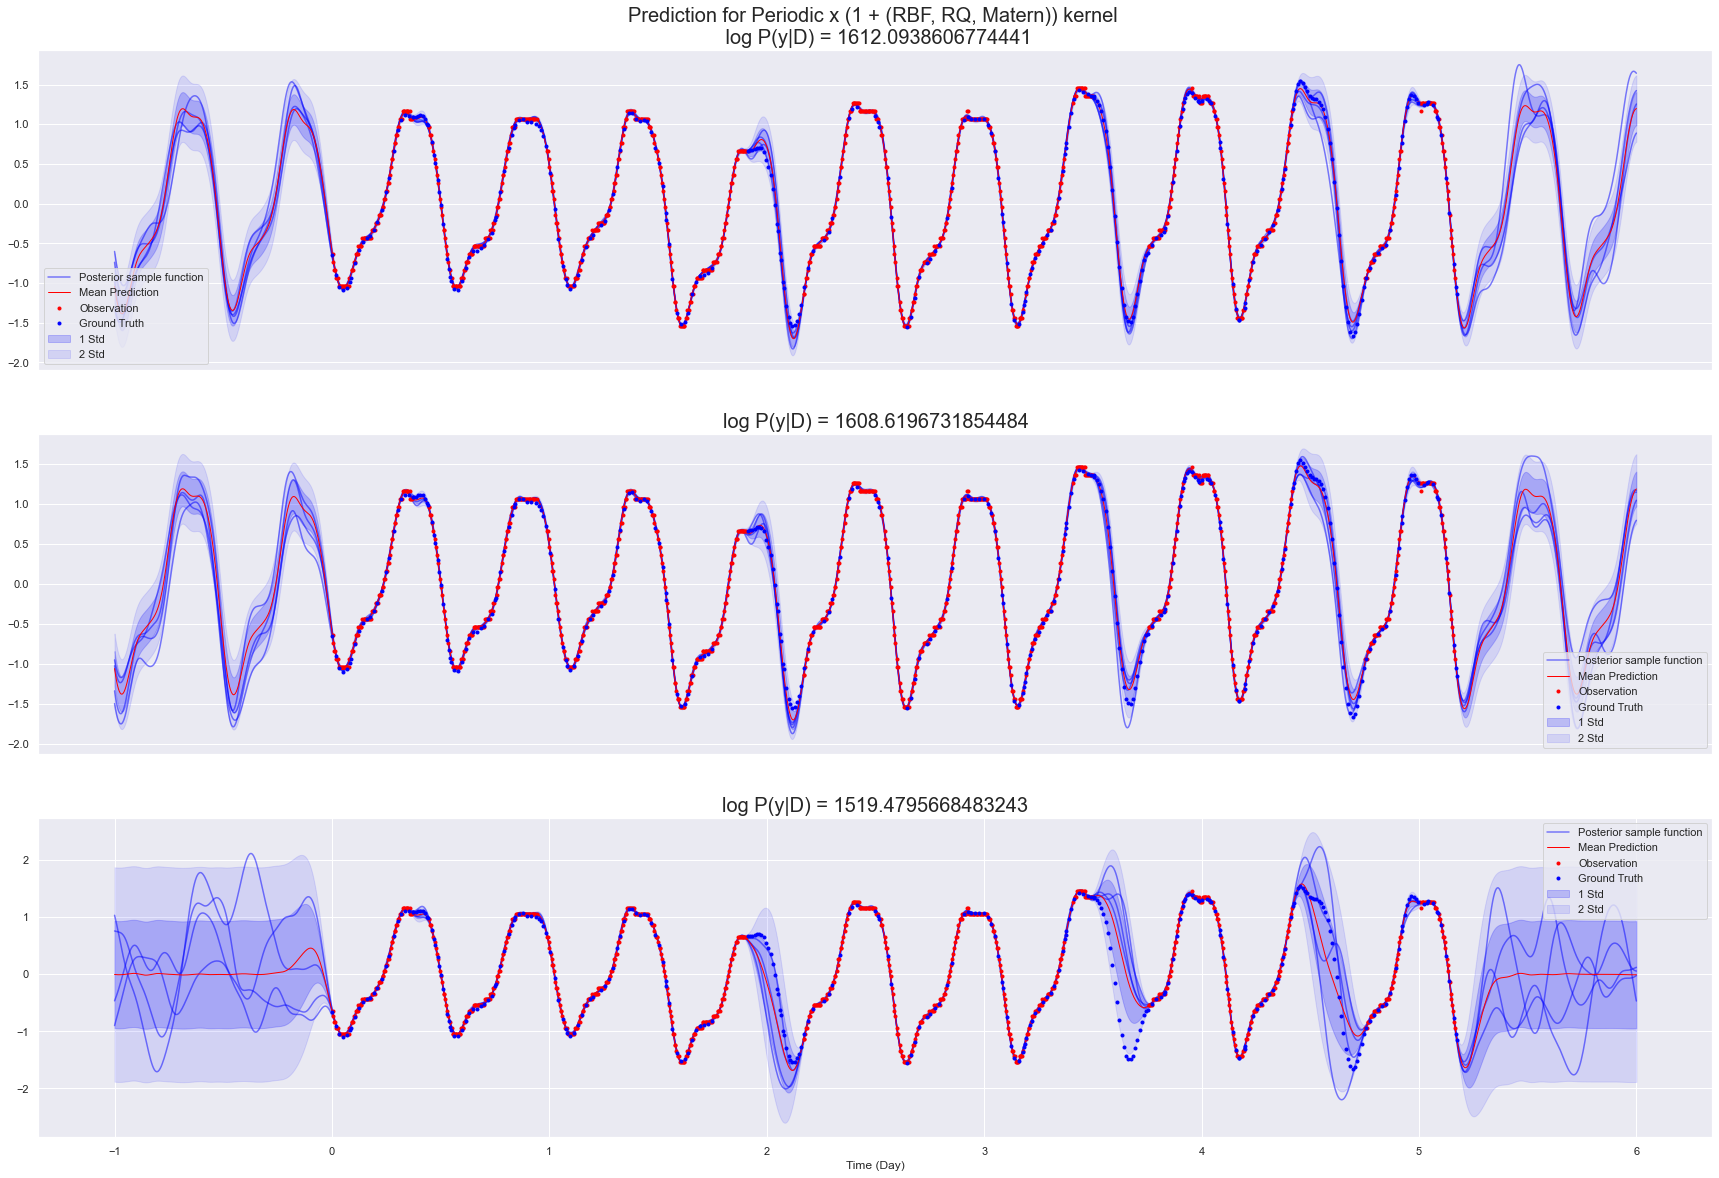

In [32]:
kernels = [(RBF(), "RBF"), (RQ(), "RQ"), (Matern(), "Matern")]
f, axs = plt.subplots(3,1, figsize=(30,20))
list_score = []
for i, (kernel, name) in enumerate(kernels):
    print("Computing Kernel:", name)
    model = GaussianProcess(Add_Kernel(Multiply_Kernel(kernel, Periodic()), Periodic()), noise = 0.04)
    model.fit(t_train, y_train)
    _, score = model.optimize(verbose = 1)
    list_score.append(score)
    result = model.predict(t_test)
    axs[i] = visualize_ax(t_train, y_train, t_test_true, y_test_true,  t_test, result, axs[i])
    axs[i].set_title("log P(y|D) = {}".format(score), fontsize=20)
axs[0].set_title("Prediction for Periodic x (1 + (RBF, RQ, Matern)) kernel \n log P(y|D) = {}".format(list_score[0]), fontsize=20)
axs[0].get_xaxis().set_visible(False)
axs[1].get_xaxis().set_visible(False)
plt.savefig("MultiplyKernelMoins.png", dpi = 150)

#### Periodic + {RBF, RQ, Matern} + (Periodic x {RBF, RQ, Matern}) Kernel
- We can add complexity to see the effect

Computing Kernel: RBF
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1511.3909518280466
Value Parameters: [1.19942101e+00 1.48716956e-02 9.09308046e+03 8.09970012e+00
 1.48989264e-02 6.28333889e-02 8.21097114e-01 7.68600427e+05
 5.74306925e-01 1.09803449e-03]
Computing Kernel: RQ
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1632.6508100755734
Value Parameters: [1.66092658 1.59108809 0.41039381 0.28551749 1.02332281 0.40953932
 0.46063654 0.58676434 0.16530535 1.15066435 0.5159376  1.09886252]
Computing Kernel: Matern
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1525.8475369818095
Value Parameters: [0.19585311 2.45438973 0.16232064 0.39417364 1.99019082 0.16236154
 0.12007766 3.57542298 1.02380219 0.67349666 0.68745554 0.45689948]


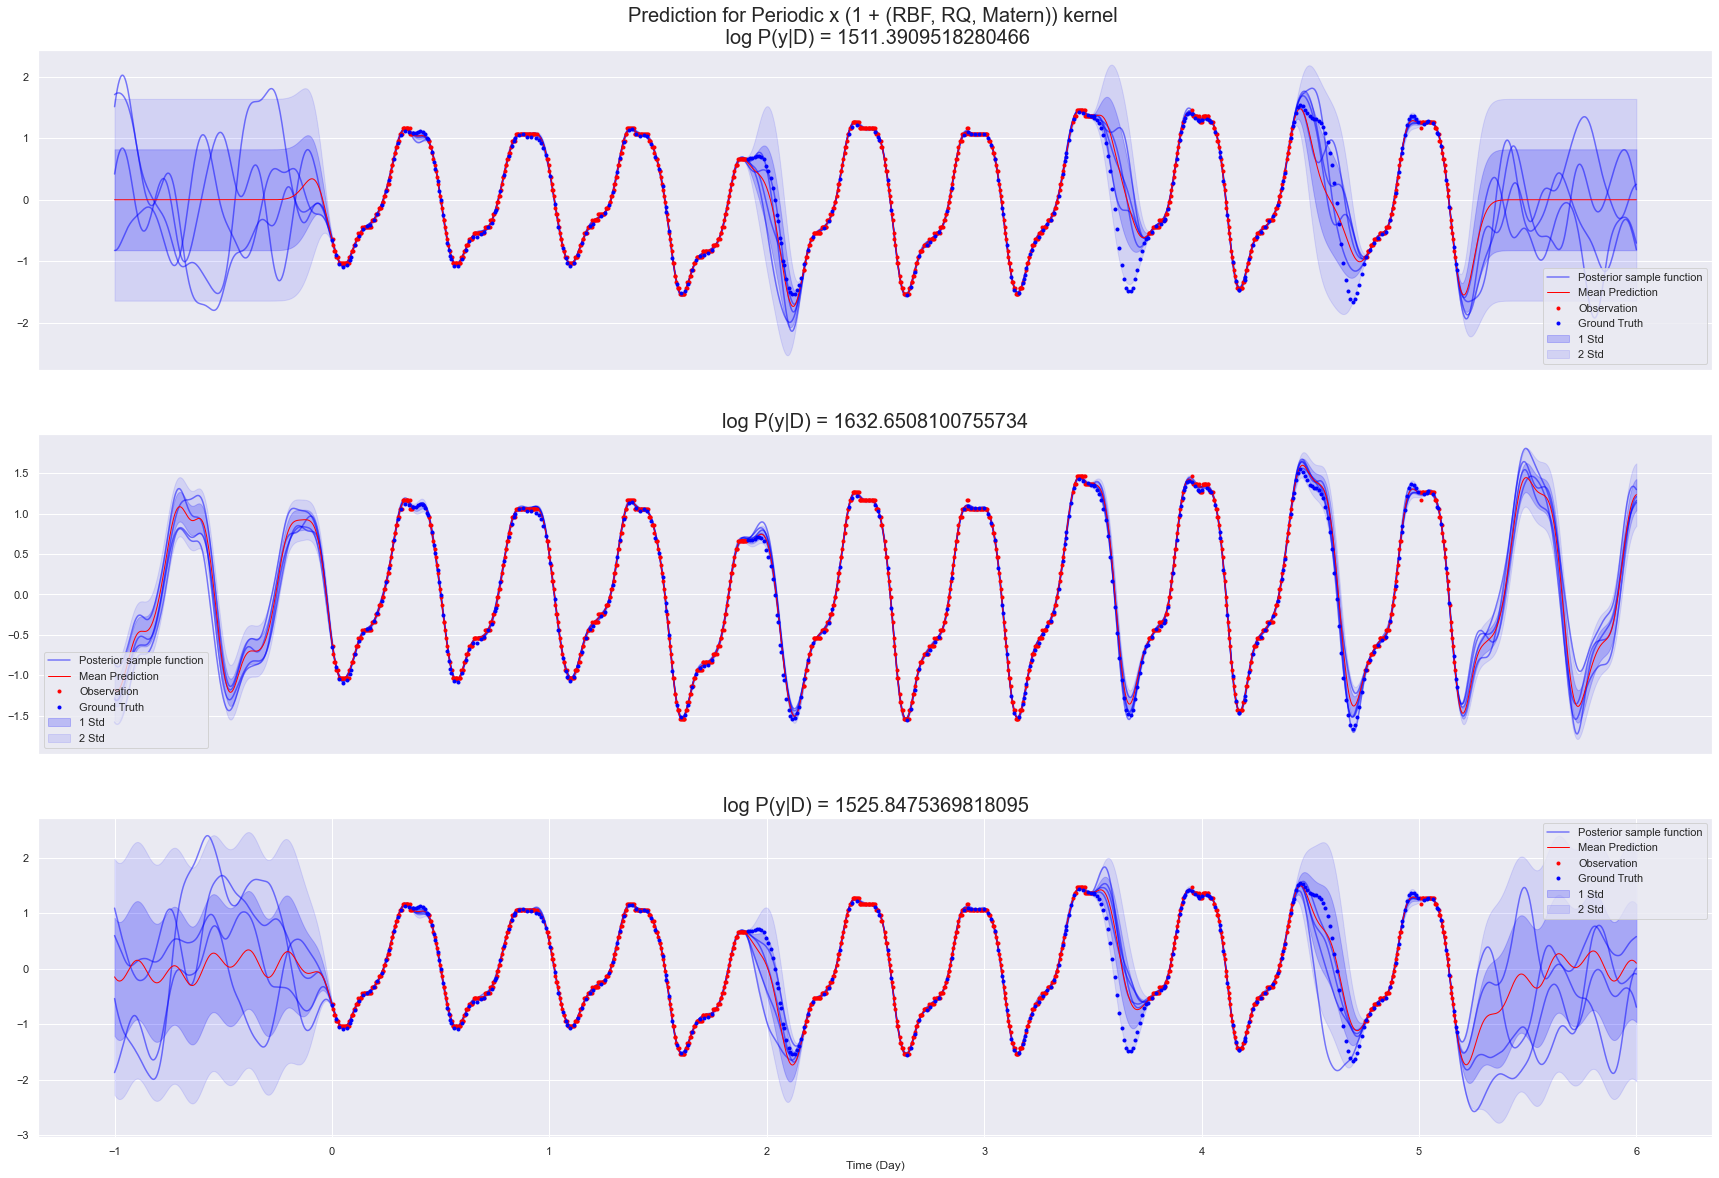

In [31]:
kernels = [(RBF(), "RBF"), (RQ(), "RQ"), (Matern(), "Matern")]
f, axs = plt.subplots(3,1, figsize=(30,20))
list_score = []
for i, (kernel, name) in enumerate(kernels):
    print("Computing Kernel:", name)
    model = GaussianProcess(Add_Kernel(Multiply_Kernel(kernel, Periodic()), Add_Kernel(kernel, Periodic())), noise = 0.04)
    model.fit(t_train, y_train)
    _, score = model.optimize(verbose = 1)
    list_score.append(score)
    result = model.predict(t_test)
    axs[i] = visualize_ax(t_train, y_train, t_test_true, y_test_true,  t_test, result, axs[i])
    axs[i].set_title("log P(y|D) = {}".format(score), fontsize=20)
axs[0].set_title("Prediction for Periodic + (RBF, RQ, Matern) + Periodic x (RBF, RQ, Matern) kernel \n log P(y|D) = {}".format(list_score[0]), fontsize=20)
axs[0].get_xaxis().set_visible(False)
axs[1].get_xaxis().set_visible(False)
#plt.savefig("MultiplyKernel.png", dpi = 150)

#### Final Report Plot
- Individual Plots manually merged

Computing Kernel: Matern
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1516.2125597093655
Value Parameters: [0.08263994 7.1893504  0.9437639 ]
Computing Kernel: Periodic
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: -6437.827138004904
Value Parameters: [0.13047719 0.5148059  0.71284427]
Computing Kernel: RQ + Periodic
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1608.6197035758246
Value Parameters: [0.07037962 1.21839064 0.20715519 0.8406838  0.51480816 0.7872517 ]
Computing Kernel: Periodic x (1 + RQ)
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1608.6196731854484
Value Parameters: [7.04056340e-02 1.21468955e+00 4.55295619e-01 7.67791775e+05
 7.66949967e-02 4.54718544e-01 8.40283933e-01 5.14809903e-01
 7.86713182e-01]
Computing Kernel: Periodic + RQ + Periodic x RQ
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1632.65081

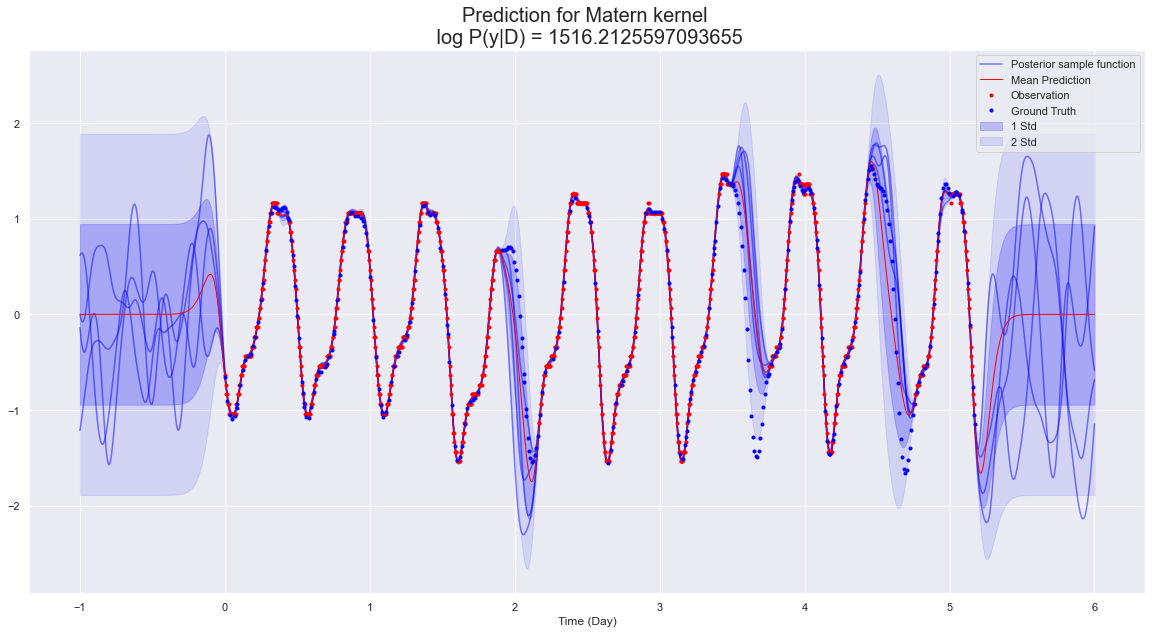

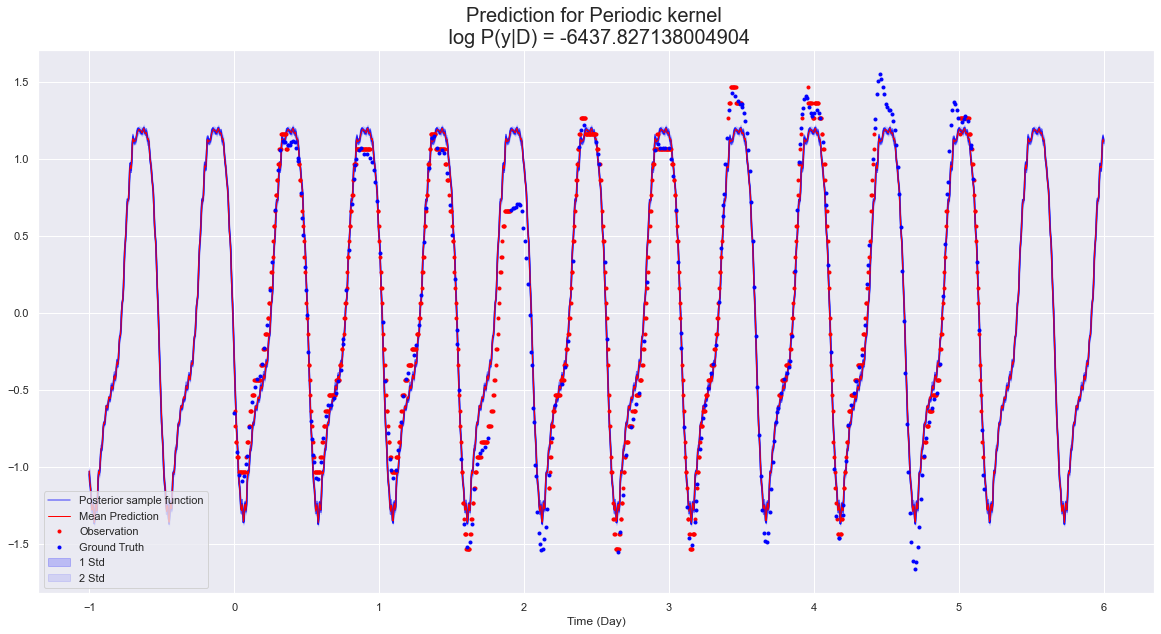

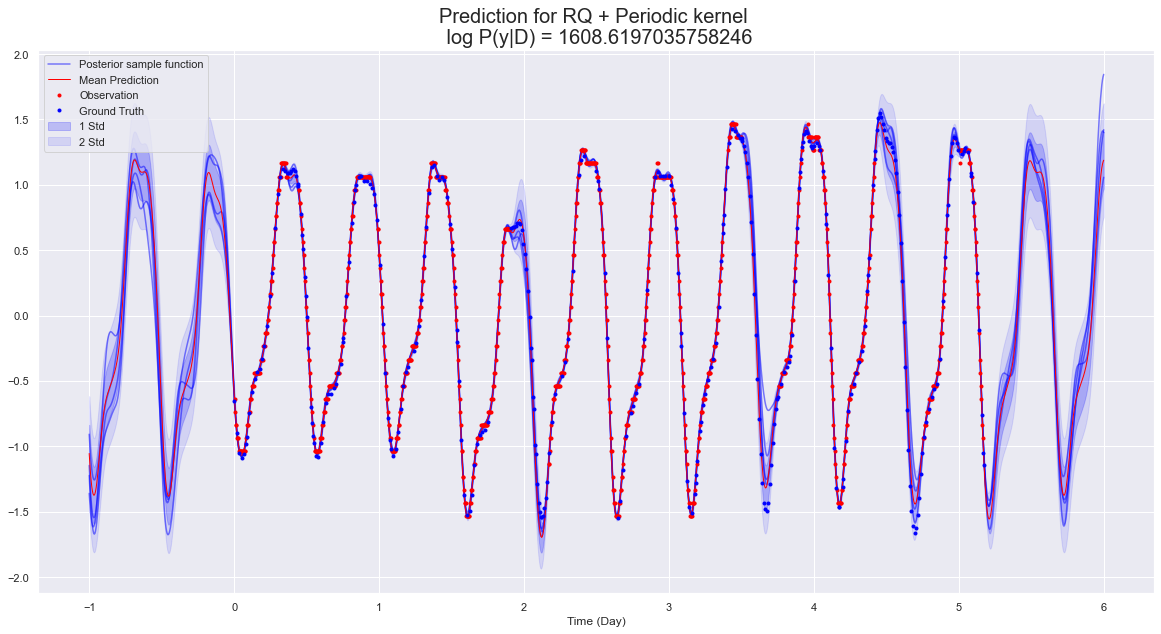

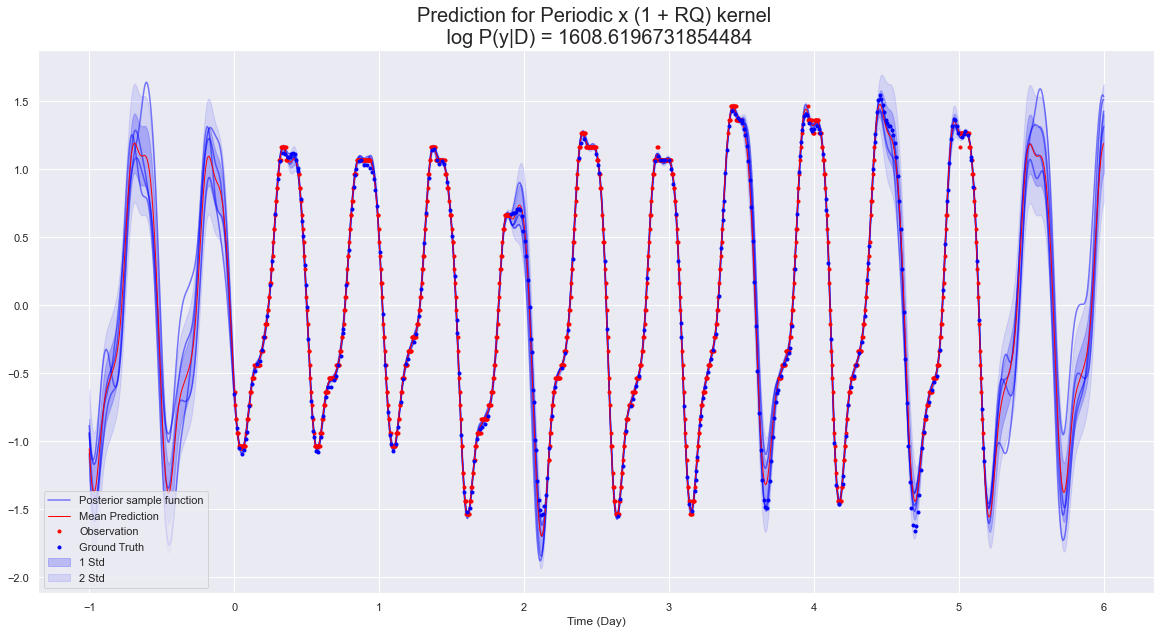

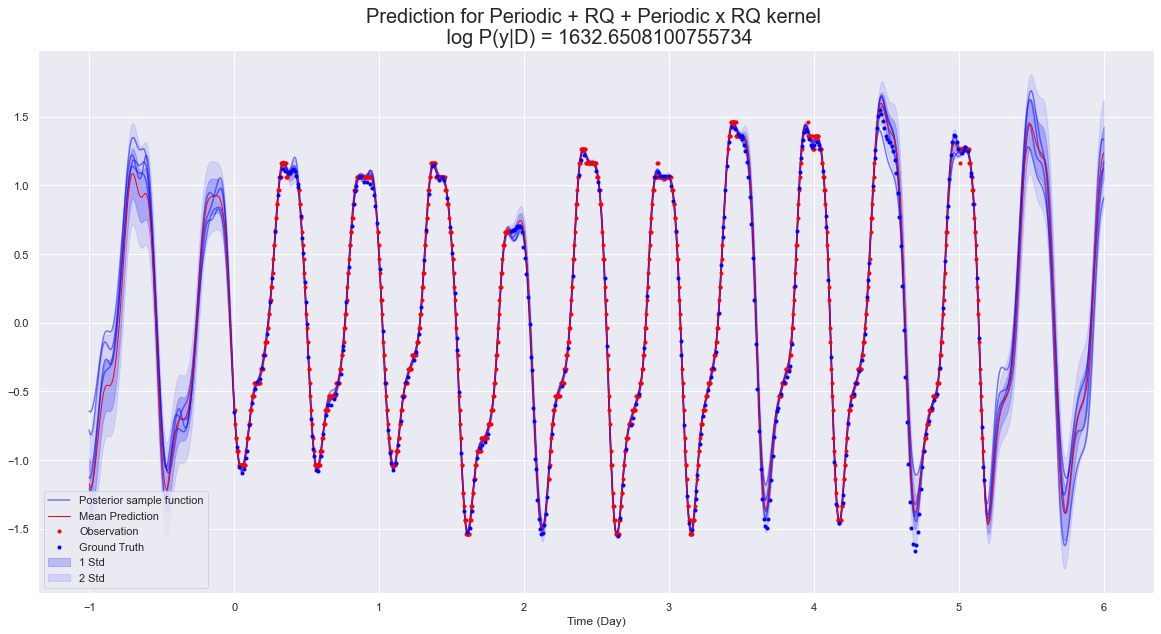

In [33]:
kernels = [(Matern(), "Matern"), (Periodic(), "Periodic"), (Add_Kernel(RQ(), Periodic()), "RQ + Periodic"), (Add_Kernel(Multiply_Kernel(RQ(), Periodic()), Periodic()), "Periodic x (1 + RQ)"), (Add_Kernel(Multiply_Kernel(RQ(), Periodic()), Add_Kernel(RQ(), Periodic())), "Periodic + RQ + Periodic x RQ")]

for i, (kernel, name) in enumerate(kernels):
    f, ax = plt.subplots(figsize=(20,10))
    print("Computing Kernel:", name)
    model = GaussianProcess(kernel, noise = 0.04)
    model.fit(t_train, y_train)
    _, score = model.optimize(verbose = 1)
    result = model.predict(t_test)
    ax = visualize_ax(t_train, y_train, t_test_true, y_test_true,  t_test, result, ax)
    ax.set_title("Prediction for {} kernel \n log P(y|D) = {}".format(name, score), fontsize=20)
    #plt.savefig(name + ".png", dpi = 150)

### Gaussian Process Regression to Predict Sequential Data
In this part we explore the robustness of the GPRM to predict data sequentially

#### Sequential Prediction via splitting data
- 5 Splits
- 10 Splits

In [247]:
## 5 Splits
kernel = Add_Kernel(RQ(), Periodic())

model = GaussianProcess(kernel, noise = 0.04)
model.fit(t_train, y_train)

splits = 5.
t_test = np.linspace(0.,6., 420)
mean_prediction_sequential, var_prediction_sequential = model.sequential_prediction(t_test, split = splits, optimization = True, verbose = 1, random_initialization = True)

1it [00:02,  2.67s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 434.9194394958757
Value Parameters: [3.61647932e-02 1.22796116e+03 4.14050363e-02 1.14909326e+00
 5.24678181e-01 9.33746012e-01]


2it [00:10,  4.12s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 805.4307863128062
Value Parameters: [5.08655482e-02 1.22327031e+03 1.68721111e-01 9.56742612e-01
 5.18811279e-01 7.97980920e-01]


3it [00:27,  8.14s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1242.9586240421158
Value Parameters: [5.45317547e-02 1.21449244e+03 1.76194970e-01 8.80097076e-01
 5.16038999e-01 7.80633977e-01]


4it [00:49, 12.46s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1496.3325647627094
Value Parameters: [5.54142282e-02 1.20918532e+03 1.88451978e-01 8.34386475e-01
 5.14661316e-01 7.73330543e-01]


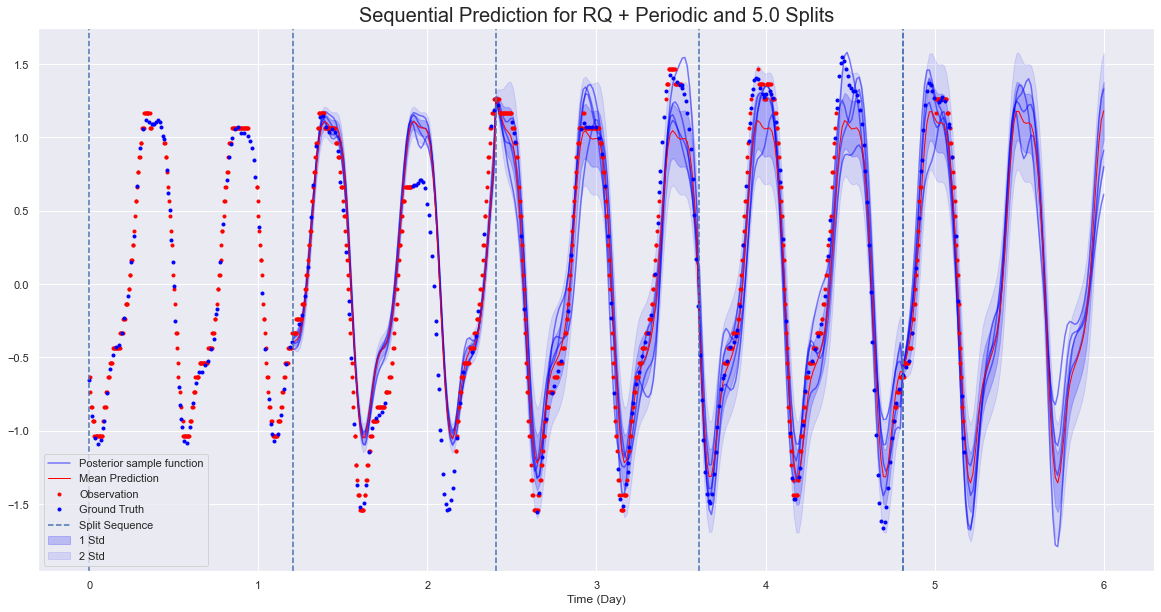

In [248]:
f, ax = plt.subplots(figsize=(20,10))
ax = visualize_ax(t_train, y_train, t_test_true, y_test_true,  (np.array(np.split(t_test, splits)[1:])).flatten(), [mean_prediction_sequential, var_prediction_sequential], ax)
for test in np.split(t_test, splits):
    ax.axvline(x = test[0], linestyle = '--')
ax.axvline(x = test[0], linestyle = '--', label = "Split Sequence")
ax.set_title("Sequential Prediction for RQ + Periodic and {} Splits".format(splits), fontsize=20)
ax.legend()
#plt.savefig("SequentialPrediction4.png", dpi = 150)

In [285]:
# 10 Splits

kernel = Add_Kernel(RQ(), Periodic())

model = GaussianProcess(kernel, noise = 0.04)
model.fit(t_train, y_train)

splits = 10.
t_test = np.linspace(0.,6., 420)
mean_prediction_sequential, var_prediction_sequential = model.sequential_prediction(t_test, split = splits, optimization = True, verbose = 1, random_initialization = True)

1it [00:00,  3.43it/s]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 190.38268791337853
Value Parameters: [0.0754139  6.45570953 0.74517693 1.09640958 0.15063321 0.036743  ]
Random Vector


2it [00:01,  1.45it/s]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 411.4577216027769
Value Parameters: [4.19381006e-02 3.23605509e+00 1.99185030e-03 3.82509208e-01
 1.23659784e+00 7.56746133e-01]


3it [00:11,  3.42s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 660.7210724382414
Value Parameters: [0.12861829 0.10044275 0.22287493 0.42929232 1.04260598 0.73662671]


4it [00:23,  5.84s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 801.4267839741818
Value Parameters: [0.1019861  0.21862413 0.20793924 0.40724747 1.03772462 0.71909986]


5it [00:41,  9.71s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1055.443214668306
Value Parameters: [0.08885276 0.43282129 0.18936819 0.39541146 1.03525058 0.72881779]


6it [00:58, 11.70s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1236.6550578000838
Value Parameters: [0.07994355 0.57147895 0.19241718 0.41692721 1.03408139 0.78235591]


7it [01:28, 17.32s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1378.6698420991545
Value Parameters: [0.07636874 0.65976374 0.21417017 0.42293607 1.03231412 0.8145437 ]


8it [01:42, 16.24s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1484.5030361856618
Value Parameters: [0.07463064 0.65418557 0.20840668 0.42953569 1.03170384 0.8254227 ]
Random Vector


9it [02:19, 15.51s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1515.791809186342
Value Parameters: [7.72778355e-02 4.00777168e+00 9.40308848e-01 8.06077884e+04
 2.93828329e-01 3.71234809e-03]


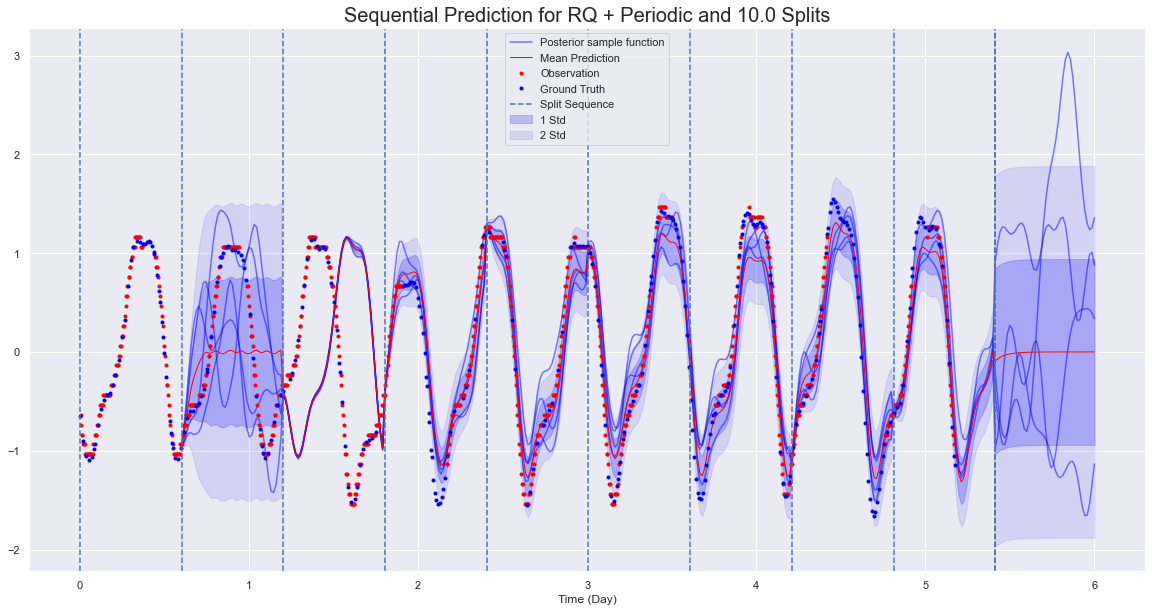

In [286]:
f, ax = plt.subplots(figsize=(20,10))
ax = visualize_ax(t_train, y_train, t_test_true, y_test_true,  (np.array(np.split(t_test, splits)[1:])).flatten(), [mean_prediction_sequential, var_prediction_sequential], ax)
for test in np.split(t_test, splits):
    ax.axvline(x = test[0], linestyle = '--')
ax.axvline(x = test[0], linestyle = '--', label = "Split Sequence")
ax.set_title("Sequential Prediction for RQ + Periodic and {} Splits".format(splits), fontsize=20)
ax.legend()
#plt.savefig("SequentialPrediction4.png", dpi = 150)

In [292]:
# 30 Splits

kernel = Add_Kernel(RQ(), Periodic())

model = GaussianProcess(kernel, noise = 0.04)
model.fit(t_train, y_train)

splits = 30.
t_test = np.linspace(0.,6., 420)
mean_prediction_sequential, var_prediction_sequential = model.sequential_prediction(t_test, split = splits, optimization = True, verbose = 1, random_initialization = False)

2it [00:00,  9.14it/s]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 72.33293380927879
Value Parameters: [0.61966961 0.98967646 0.00265596 0.53823127 0.85052591 0.58078015]
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 139.45868482343207
Value Parameters: [0.62035212 0.99081765 0.00265628 0.55348582 0.9149273  0.70241985]
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 188.42860944632594
Value Parameters: [0.62038909 0.99101129 0.0026565  0.55430879 0.8205943  0.71550796]
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 266.62324180912935
Value Parameters: [0.62038266 0.99101047 0.00265659 0.47259928 0.94944911 0.71724618]


5it [00:01,  4.26it/s]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 331.21743414616515
Value Parameters: [0.61944283 0.99129672 0.00266435 0.34674691 1.29182791 0.70301789]


6it [00:01,  2.85it/s]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 411.45727376984775
Value Parameters: [0.61944699 0.9912832  0.0026642  0.38249015 1.23658699 0.75672998]


7it [00:05,  1.54s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 504.9680067637829
Value Parameters: [3.65580941e-02 6.72737913e+02 4.72237347e-02 4.70087159e-01
 1.04631855e+00 7.94730739e-01]


8it [00:08,  1.86s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 574.7540730374147
Value Parameters: [4.33848319e-02 6.72344337e+02 1.24462154e-01 4.81505349e-01
 1.04106456e+00 8.17754526e-01]


9it [00:10,  1.79s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 655.5535166693955
Value Parameters: [4.69908871e-02 6.71702188e+02 1.43156234e-01 4.76507539e-01
 1.04403395e+00 8.07030790e-01]


10it [00:15,  2.75s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 699.6862308561973
Value Parameters: [5.59343590e-02 6.69062175e+02 1.62721423e-01 3.98918606e-01
 1.03733459e+00 6.89296475e-01]


11it [00:18,  2.87s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 715.0102954157694
Value Parameters: [5.42272824e-02 6.68068577e+02 1.63123606e-01 4.03128502e-01
 1.03925791e+00 7.08940762e-01]


12it [00:23,  3.42s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 797.0312266128504
Value Parameters: [5.95350153e-02 6.67269338e+02 1.75192858e-01 3.89376040e-01
 1.03548451e+00 6.97882177e-01]


13it [00:28,  4.06s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 880.277448213793
Value Parameters: [5.96504663e-02 6.67073316e+02 1.79747510e-01 3.90871978e-01
 1.03444457e+00 7.16018624e-01]


14it [00:32,  4.14s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 965.7290351655887
Value Parameters: [6.00397399e-02 6.66667807e+02 1.67745284e-01 3.89077798e-01
 1.03455158e+00 7.08656444e-01]


15it [00:42,  5.82s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1051.9500061823503
Value Parameters: [5.81437054e-02 6.66221900e+02 1.60513128e-01 3.85695153e-01
 1.03411530e+00 7.17961756e-01]


16it [00:52,  7.02s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1128.0190084854344
Value Parameters: [5.81551766e-02 6.65937601e+02 1.69200990e-01 3.90748600e-01
 1.03387054e+00 7.32173864e-01]


17it [01:01,  7.55s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1192.5825806765752
Value Parameters: [5.45580032e-02 6.65427807e+02 1.65692074e-01 4.03305214e-01
 1.03241236e+00 7.53335499e-01]


18it [01:12,  8.66s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1231.93664559443
Value Parameters: [5.51197735e-02 6.64498078e+02 1.63528598e-01 4.05989886e-01
 1.03303721e+00 7.65851082e-01]


19it [01:24,  9.74s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1254.66478890283
Value Parameters: [5.60455696e-02 6.63083843e+02 1.65154185e-01 4.03857992e-01
 1.03276329e+00 7.58344078e-01]


20it [01:39, 11.23s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1304.4965636763116
Value Parameters: [5.72222291e-02 6.61512134e+02 1.83045426e-01 4.06726000e-01
 1.03146642e+00 7.77790766e-01]


21it [01:56, 12.96s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1374.4153315504525
Value Parameters: [5.55092165e-02 6.59802975e+02 1.89583056e-01 4.08499905e-01
 1.03125790e+00 7.89957104e-01]


22it [02:18, 15.74s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1451.1364438234664
Value Parameters: [5.32903830e-02 6.58603067e+02 1.85434824e-01 4.19128208e-01
 1.03028011e+00 8.14044117e-01]


23it [02:29, 14.22s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1455.029565695399
Value Parameters: [5.34578004e-02 6.58358149e+02 1.85680782e-01 4.18791172e-01
 1.03030859e+00 8.14202927e-01]


24it [02:37, 12.45s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1479.572050801599
Value Parameters: [5.31257784e-02 6.57947863e+02 1.80755037e-01 4.19682560e-01
 1.03043067e+00 8.14655423e-01]


25it [02:57, 14.75s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1524.3671342550317
Value Parameters: [5.39260638e-02 6.57447732e+02 1.85322409e-01 4.18282647e-01
 1.02970035e+00 8.17566696e-01]


26it [03:08, 13.57s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1587.5660531204235
Value Parameters: [5.37597917e-02 6.57394769e+02 1.85001191e-01 4.14726950e-01
 1.02961135e+00 8.19283596e-01]


27it [03:21, 13.48s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1587.5713504621608
Value Parameters: [5.35908589e-02 6.56917974e+02 1.82901911e-01 4.14939710e-01
 1.02963051e+00 8.19767152e-01]


28it [03:25, 10.46s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1587.5713505735862
Value Parameters: [5.35908583e-02 6.56917957e+02 1.82901912e-01 4.14939716e-01
 1.02963100e+00 8.19767183e-01]


29it [03:28,  7.17s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1587.5713506779302
Value Parameters: [5.35908693e-02 6.56916211e+02 1.82902033e-01 4.14940137e-01
 1.02963147e+00 8.19769921e-01]


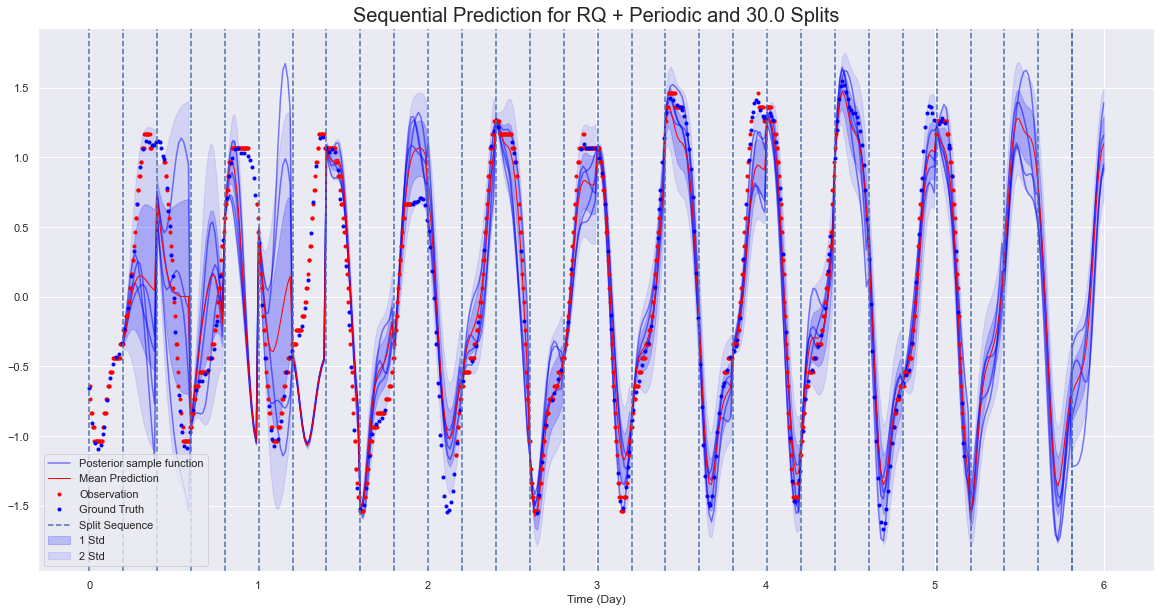

In [293]:
f, ax = plt.subplots(figsize=(20,10))
ax = visualize_ax(t_train, y_train, t_test_true, y_test_true,  (np.array(np.split(t_test, splits)[1:])).flatten(), [mean_prediction_sequential, var_prediction_sequential], ax)
for test in np.split(t_test, splits):
    ax.axvline(x = test[0], linestyle = '--')
ax.axvline(x = test[0], linestyle = '--', label = "Split Sequence")
ax.set_title("Sequential Prediction for RQ + Periodic and {} Splits".format(splits), fontsize=20)
ax.legend()
plt.savefig("SequentialPrediction30splits.png", dpi = 150)

In [294]:
# 30 Splits

kernel = Add_Kernel(RQ(), Periodic())

model = GaussianProcess(kernel, noise = 0.04)
model.fit(t_train, y_train)

splits = 30.
t_test = np.linspace(0.,6., 420)
mean_prediction_sequential, var_prediction_sequential = model.sequential_prediction(t_test, split = splits, optimization = True, verbose = 1, random_initialization = True)

0it [00:00, ?it/s]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 72.47457785056025
Value Parameters: [0.78527315 0.77071471 0.02789322 2.00871194 0.29222049 0.66822999]
-----Result Optimization-----

2it [00:00,  7.62it/s]


Convergence: True
Value Log Marginal Likelihood: 140.66671243914942
Value Parameters: [1.36257784 0.69537205 0.00927888 1.84250977 0.46106838 1.28931819]
-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 188.42830248998766
Value Parameters: [1.36061713 0.69529615 0.00928155 0.55436466 0.82053472 0.71554365]


4it [00:00,  6.33it/s]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 266.62285755285296
Value Parameters: [1.36050843 0.69530195 0.00928138 0.47260733 0.949449   0.71728581]


5it [00:01,  3.27it/s]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 333.74586305930404
Value Parameters: [1.34319843 0.69591077 0.00940904 0.43901804 1.0569911  0.73027711]


6it [00:02,  2.20it/s]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 419.1460546958737
Value Parameters: [0.44644562 0.77575633 0.04247504 0.44041491 1.04849885 0.73535994]


7it [00:04,  1.03it/s]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 496.10865855429256
Value Parameters: [0.67511355 0.91293491 0.04626867 0.44881255 1.04577845 0.75101592]


8it [00:08,  1.90s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 577.0363230547093
Value Parameters: [0.10732116 0.14012258 0.22277546 0.48142316 1.04396065 0.8194623 ]


9it [00:11,  2.36s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 660.7061515802153
Value Parameters: [0.11377122 0.13636006 0.19904644 0.42895191 1.04260147 0.7341271 ]


10it [00:18,  3.75s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 705.0154712147705
Value Parameters: [0.12541505 0.11253166 0.22732031 0.41913654 1.04079531 0.72372429]


11it [00:26,  4.93s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 719.9087021005039
Value Parameters: [0.10718698 0.1787111  0.20927457 0.41525909 1.04101162 0.72133124]


12it [00:31,  4.84s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 801.4199353498778
Value Parameters: [0.10847365 0.18373904 0.21998386 0.40781043 1.03774931 0.72132683]


13it [00:36,  5.11s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 883.313916167778
Value Parameters: [0.0930818  0.37043209 0.20805624 0.40450008 1.0360931  0.73184723]


14it [00:43,  5.55s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 968.63025851986
Value Parameters: [0.09268037 0.37108014 0.19827172 0.39956926 1.03564034 0.72035254]


15it [00:51,  6.21s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1055.4340171654312
Value Parameters: [0.09268714 0.37320829 0.19634924 0.39602655 1.03527084 0.73157029]


16it [01:05,  8.74s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1129.7439003835982
Value Parameters: [0.07546779 0.97829217 0.1871992  0.40171893 1.03457622 0.75176596]


17it [01:27, 12.77s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1195.8013440962618
Value Parameters: [0.0751969  0.72430285 0.18788233 0.41751602 1.03373746 0.78104192]


18it [01:40, 12.83s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1236.6193903277028
Value Parameters: [0.07567515 0.70116671 0.18335199 0.41646144 1.03405682 0.78077658]


19it [02:05, 16.39s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1259.883616923884
Value Parameters: [0.08300505 0.49544411 0.19565902 0.41580206 1.03404148 0.77941867]


20it [02:19, 15.54s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1311.0756322204707
Value Parameters: [0.08411523 0.49459483 0.2102803  0.41835387 1.03322176 0.7905748 ]


21it [02:45, 18.65s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1378.6698397557511
Value Parameters: [0.07636891 0.65981129 0.21418151 0.4228863  1.03231492 0.81462691]


22it [02:52, 15.33s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1455.9870393472556
Value Parameters: [0.07547087 0.65858045 0.21564057 0.42658056 1.03159747 0.81408216]


23it [03:02, 13.60s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1459.9284927334302
Value Parameters: [0.07564294 0.65383175 0.2152487  0.42939799 1.03161898 0.83329835]


24it [03:13, 12.77s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1484.5044134000898
Value Parameters: [0.07481823 0.65013719 0.20910341 0.43054239 1.03170502 0.83394603]


25it [03:28, 13.57s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1528.57121645698
Value Parameters: [0.07556328 0.65985428 0.21508021 0.43034484 1.03112235 0.83778545]


26it [03:47, 15.11s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1591.636354355605
Value Parameters: [0.07201458 0.80668805 0.20682621 0.42763808 1.03077884 0.84883389]


27it [03:49, 11.38s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1591.6363546503633
Value Parameters: [0.07201456 0.80668803 0.20682624 0.42763778 1.03077814 0.84883367]


28it [03:52,  8.90s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1591.6363549497216
Value Parameters: [0.07201455 0.80668802 0.20682626 0.42763757 1.03077884 0.84883354]


29it [03:55,  8.12s/it]

-----Result Optimization-----
Convergence: True
Value Log Marginal Likelihood: 1591.636355251255
Value Parameters: [0.07201453 0.806688   0.20682629 0.42763725 1.03077814 0.84883332]


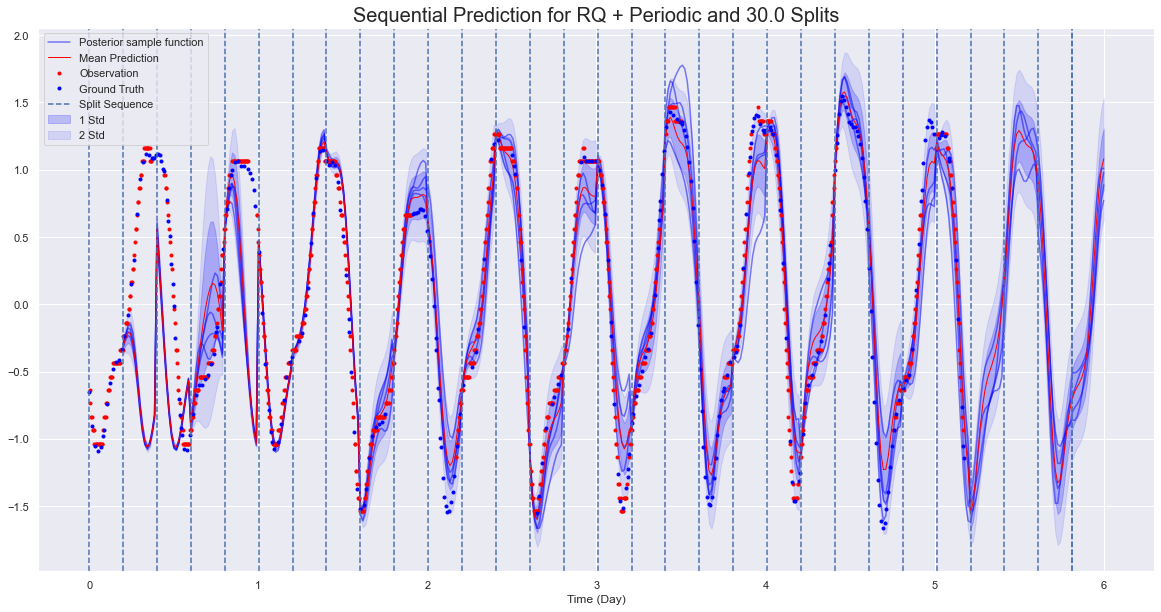

In [295]:
f, ax = plt.subplots(figsize=(20,10))
ax = visualize_ax(t_train, y_train, t_test_true, y_test_true,  (np.array(np.split(t_test, splits)[1:])).flatten(), [mean_prediction_sequential, var_prediction_sequential], ax)
for test in np.split(t_test, splits):
    ax.axvline(x = test[0], linestyle = '--')
ax.axvline(x = test[0], linestyle = '--', label = "Split Sequence")
ax.set_title("Sequential Prediction for RQ + Periodic and {} Splits".format(splits), fontsize=20)
ax.legend()
plt.savefig("SequentialPrediction30splitsnori.png", dpi = 150)

## To Do :
- Debug Sequential Prediction
- Write Regression Comment
- Resize regression results
- Write about lookahead